#Datos Personales
Nombre: Walter Benjamin Vaquera Reyes

Carrera: Ciencias de la Computación

Github: https://github.com/walterbvr/inteligenciaArtificial1/tree/main/Parciales/Parcial1

# 1 Importamos librerias necesarias




In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2 Cargamos los datos del dataset con Pandas

In [3]:
data = pd.read_csv('/content/drive/MyDrive/InteligenciaArtificial1/Parcial1/credit_score.csv', delimiter=',', encoding='utf-8')
data

,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,1,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.465380,312.494089,2
1,2,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.465380,284.629162,2
2,3,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.465380,331.209863,2
3,4,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.465380,223.451310,2
4,5,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.465380,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,502.38,34.663572,378.0,35.104023,24.028477,479.866228,0
99996,5,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,502.38,40.565631,379.0,35.104023,24.028477,496.651610,0
99997,6,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,3.0,502.38,41.255522,380.0,35.104023,24.028477,516.809083,0
99998,7,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,3.0,502.38,33.638208,381.0,35.104023,24.028477,319.164979,1


## 2.1 Contamos las caracteristicas y clases de nuestro dataset

In [4]:
#Contamos cuantas caracteristicas tiene nuestro dataset sin contar con la columna y
features_counts = data.drop(["Credit_Score"],axis=1).shape[1]
print(f"La cantidad de caracteristicas de nuestro dataset es: {features_counts}")

#Contamos cuantas clases tiene nuestra columna y
labels_counts = len(np.unique(data['Credit_Score']))
print(f'La cantidad de clases es: {labels_counts} \n')

data["Credit_Score"].value_counts()

La cantidad de caracteristicas de nuestro dataset es: 19
La cantidad de clases es: 3 



,count
Credit_Score,
1,53174
0,28998
2,17828


## 2.2 Graficamos la distribución de Número de Pagos Retrasados por Credit_Score

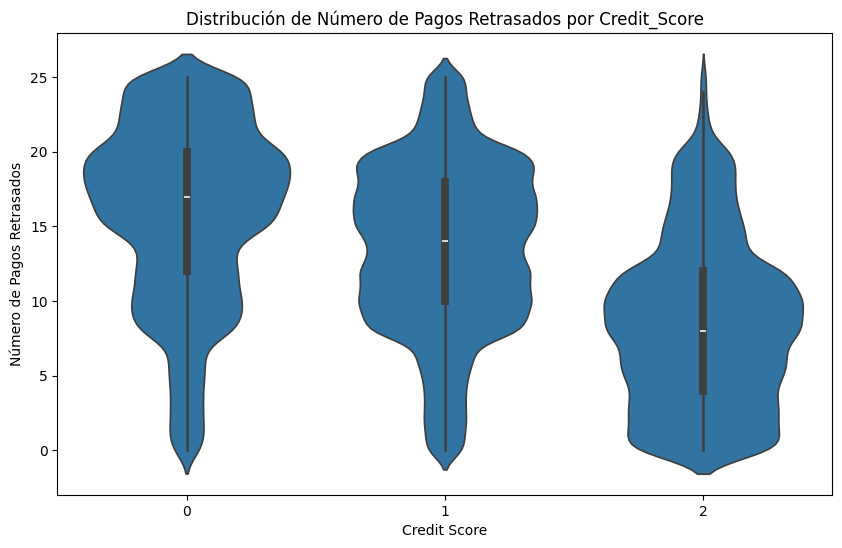

In [5]:
# Creamos un gráfico de violin
plt.figure(figsize=(10, 6))
sns.violinplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=data)

# Añadimos títulos y etiquetas
plt.title('Distribución de Número de Pagos Retrasados por Credit_Score')
plt.xlabel('Credit Score')
plt.ylabel('Número de Pagos Retrasados')

# Mostramos la gráfica
plt.show()

# 3 Agregamos datos sintéticos al dataset

In [6]:
# Establecemos la semilla para la replicabilidad
np.random.seed(42)

# Creamos las nuevas columnas
occupation_values = np.random.choice(['Lawyer', 'Engineer', 'Architect', 'Mechanic', 'Scientist'], size=len(data))
payment_of_mint_amount_values = np.random.choice([True, False], size=len(data))

# Creamos un DataFrame con las nuevas columnas
new_columns = pd.DataFrame({
    'Occupation': occupation_values,
    'Payment_of_Mint_Amount': payment_of_mint_amount_values
})

# Concatenamos las nuevas columnas al principio del DataFrame original
data = pd.concat([new_columns, data], axis=1)

# Mostrar el DataFrame resultante
data

,Occupation,Payment_of_Mint_Amount,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,Mechanic,False,1,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.465380,312.494089,2
1,Scientist,False,2,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.465380,284.629162,2
2,Architect,False,3,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.465380,331.209863,2
3,Scientist,True,4,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.465380,223.451310,2
4,Scientist,True,5,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.465380,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Engineer,True,4,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,7.0,11.50,3.0,502.38,34.663572,378.0,35.104023,24.028477,479.866228,0
99996,Lawyer,True,5,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,7.0,11.50,3.0,502.38,40.565631,379.0,35.104023,24.028477,496.651610,0
99997,Scientist,False,6,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,6.0,11.50,3.0,502.38,41.255522,380.0,35.104023,24.028477,516.809083,0
99998,Mechanic,True,7,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,6.0,11.50,3.0,502.38,33.638208,381.0,35.104023,24.028477,319.164979,1


## 3.1 Convertimos los datos sintéticos en valores numéricos

In [7]:
# Creamos un diccionario para mapear las ocupaciones a números
occupation_mapping = {
    'Lawyer': 0,
    'Engineer': 1,
    'Architect': 2,
    'Mechanic': 3,
    'Scientist': 4
}

# Aplicamos el mapeo al DataFrame
data['Occupation'] = data['Occupation'].map(occupation_mapping)

# Convertimos la columna 'Payment_of_Mint_Amount' a valores numéricos (True: 1, False: 0)
data['Payment_of_Mint_Amount'] = data['Payment_of_Mint_Amount'].astype(int)

# Mostrar el DataFrame resultante
data

,Occupation,Payment_of_Mint_Amount,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,3,0,1,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.465380,312.494089,2
1,4,0,2,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.465380,284.629162,2
2,2,0,3,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.465380,331.209863,2
3,4,1,4,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.465380,223.451310,2
4,4,1,5,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.465380,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,1,4,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,7.0,11.50,3.0,502.38,34.663572,378.0,35.104023,24.028477,479.866228,0
99996,0,1,5,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,7.0,11.50,3.0,502.38,40.565631,379.0,35.104023,24.028477,496.651610,0
99997,4,0,6,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,6.0,11.50,3.0,502.38,41.255522,380.0,35.104023,24.028477,516.809083,0
99998,3,1,7,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,6.0,11.50,3.0,502.38,33.638208,381.0,35.104023,24.028477,319.164979,1


## 3.2 Duplicamos el número de ejemplos en el dataset

In [8]:
# Establecer la semilla para la replicabilidad
np.random.seed(42)

# Guardamos el número de columnas
num_original_rows = len(data)

# Crear un nuevo DataFrame para los datos generados
new_data = pd.DataFrame()

# Generar nuevos datos sintéticos
for col in data.columns:
    mean = data[col].mean()
    std = data[col].std()

    # Generamos datos sintéticos en base a la media y desviación estandar de cada columna
    synthetic_data = np.random.normal(loc=mean, scale=std, size=num_original_rows)

    new_data[col] = synthetic_data

# Concatenar el DataFrame original con los datos sintéticos
data = pd.concat([data, new_data], ignore_index=True)
data

,Occupation,Payment_of_Mint_Amount,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,3.000000,0.000000,1.000000,23.000000,8.210003e+08,19114.120000,1824.843333,3.000000,4.000000,3.000000,...,7.000000,11.270000,4.000000,809.980000,26.822620,265.000000,49.574949,21.465380,312.494089,2.000000
1,4.000000,0.000000,2.000000,23.000000,8.210003e+08,19114.120000,1824.843333,3.000000,4.000000,3.000000,...,4.000000,11.270000,4.000000,809.980000,31.944960,266.000000,49.574949,21.465380,284.629162,2.000000
2,2.000000,0.000000,3.000000,23.000000,8.210003e+08,19114.120000,1824.843333,3.000000,4.000000,3.000000,...,7.000000,11.270000,4.000000,809.980000,28.609352,267.000000,49.574949,21.465380,331.209863,2.000000
3,4.000000,1.000000,4.000000,23.000000,8.210003e+08,19114.120000,1824.843333,3.000000,4.000000,3.000000,...,4.000000,6.270000,4.000000,809.980000,31.377862,268.000000,49.574949,21.465380,223.451310,2.000000
4,4.000000,1.000000,5.000000,23.000000,8.210003e+08,19114.120000,1824.843333,3.000000,4.000000,3.000000,...,4.000000,11.270000,4.000000,809.980000,24.797347,269.000000,49.574949,21.465380,341.489231,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1.683150,-0.133266,3.509438,27.347726,8.883141e+08,54742.642252,3690.889926,2.771280,5.877985,18.317116,...,15.061661,20.603574,13.213546,38.135555,26.656957,311.758219,43.536725,86.617500,367.423919,2.185219
199996,1.194803,0.781838,2.924810,8.380930,4.685416e+08,20472.572773,2936.572888,10.255418,8.288398,15.421705,...,2.295314,14.921363,2.767550,1555.076116,29.544823,298.394563,162.745413,51.183977,350.666364,0.919954
199997,2.582323,0.579020,2.942746,42.267881,4.295888e+08,44780.384082,2732.905505,7.905638,5.678331,13.544487,...,7.651483,7.686918,2.966377,340.942201,40.041198,311.412073,264.098215,64.346319,522.822352,0.763161
199998,1.703182,0.926848,2.043517,38.295396,2.685391e+08,47106.081287,6178.988585,5.579318,7.630060,27.374339,...,13.301563,6.278923,4.267053,784.502432,30.683781,178.118789,-9.102208,50.193352,397.614848,1.336705


# 4 Separamos los datos del dataset por clases

In [9]:
#creamos una variable temporal que concentra toda la columna de 'Credit_Score'
y_temp = data['Credit_Score']

# Para la clase 0, separamos los datos en train_class_0, test_class_0
data_class_0 = data[y_temp == 0]
train_class_0, test_class_0 = train_test_split(data_class_0, test_size=0.2, random_state=42)

# Para la clase 1, separamos los datos en train_class_1, test_class_1
data_class_1 = data[y_temp == 1]
train_class_1, test_class_1 = train_test_split(data_class_1, test_size=0.2, random_state=42)

# Para la clase 2, separamos los datos en train_class_2, test_class_2
data_class_2 = data[y_temp == 2]
train_class_2, test_class_2 = train_test_split(data_class_2, test_size=0.2, random_state=42)

In [10]:
print(f"Para la clase 0 tenemos una cantidad de: { data_class_0.shape[0]} donde el 80% es: {train_class_0.shape[0]} y el 20% es: {test_class_0.shape[0]}")
print(f"Para la clase 1 tenemos una cantidad de: { data_class_1.shape[0]} donde el 80% es: {train_class_1.shape[0]} y el 20% es: {test_class_1.shape[0]}")
print(f"Para la clase 2 tenemos una cantidad de: { data_class_2.shape[0]} donde el 80% es: {train_class_2.shape[0]} y el 20% es: {test_class_2.shape[0]}")
print(f"La cantidad total de datos es: {data.shape[0]}")

Para la clase 0 tenemos una cantidad de: 28998 donde el 80% es: 23198 y el 20% es: 5800
Para la clase 1 tenemos una cantidad de: 53174 donde el 80% es: 42539 y el 20% es: 10635
Para la clase 2 tenemos una cantidad de: 17828 donde el 80% es: 14262 y el 20% es: 3566
La cantidad total de datos es: 200000


## 4.1 Guardamos las X's y Y's de los datos de cada clase

In [11]:
#ENTRENAMIENTO
#para la clase 0
X_train_class_0 = train_class_0.drop(['Credit_Score'], axis=1)
y_train_class_0 = train_class_0['Credit_Score']

#para la clase 1
X_train_class_1 = train_class_1.drop(['Credit_Score'], axis=1)
y_train_class_1 = train_class_1['Credit_Score']

#para la clase 2
X_train_class_2 = train_class_2.drop(['Credit_Score'], axis=1)
y_train_class_2 = train_class_2['Credit_Score']


#PRUEBAS
#para la clase 0
X_test_class_0 = test_class_0.drop(['Credit_Score'], axis=1)
y_test_class_0 = test_class_0['Credit_Score']

#para la clase 1
X_test_class_1 = test_class_1.drop(['Credit_Score'], axis=1)
y_test_class_1 = test_class_1['Credit_Score']

#para la clase 2
X_test_class_2 = test_class_2.drop(['Credit_Score'], axis=1)
y_test_class_2 = test_class_2['Credit_Score']

## 4.2 Unimos los datos en una sola matriz

In [12]:
#unimos los datos de entrenamiento
X_train = pd.concat([X_train_class_0, X_train_class_1, X_train_class_2]).values
y_train = pd.concat([y_train_class_0, y_train_class_1, y_train_class_2]).values

#mezclamos los datos de entrenamiento
indices_train = np.random.permutation(len(X_train))
X_train = X_train[indices_train]
y_train = y_train[indices_train]

#unimos los datos de pruebas
X_test = pd.concat([X_test_class_0, X_test_class_1, X_test_class_2]).values
y_test = pd.concat([y_test_class_0, y_test_class_1, y_test_class_2]).values

#mezclamos los datos de pruebas
indices_test = np.random.permutation(len(X_test))
X_test = X_test[indices_test]
y_test = y_test[indices_test]

In [13]:
print('\nEl 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(X_train)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(X_test)))
print('La cantidad total de ejemplos es de: {:.0f} ejemplos'.format( len(data)))


El 80% de ejemplos para entrenamiento son la cantidad de: 79999 de ejemplos
El 20% de ejemplos para pruebas son la cantidad de: 20001 de ejemplos
La cantidad total de ejemplos es de: 200000 ejemplos


# 5 Normalizamos caracteristicas y añadimos un sesgo


In [14]:
def  featureNormalize(X):
    X_norm = X.copy()

    # Inicializa dos vectores para la media (mu) y la desviación estándar (sigma)
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # Calcula la media de cada característica
    mu = np.mean(X, axis = 0)

    # Calcula la desviación estándar de cada característica
    sigma = np.std(X, axis = 0)
    sigma[sigma == 0] = 1 # Asignamos una desviación estándar de 1 cuando es cero

    # Normalizamos cada característica restando la media y dividiendo por la desviación estándar
    X_norm = (X - mu) / sigma

    return X_norm

In [15]:
def agregarSesgo(X):
    m = X.shape[0]
    return np.concatenate([np.ones((m, 1)), X], axis=1)  # Agregar columna de unos

In [16]:
# Normalizamos nuestros datos y añadimos la columna de sesgo
X_train_norm = featureNormalize(X_train)
X_test_norm = featureNormalize(X_test)

X_train_ready = agregarSesgo(X_train_norm)
X_test_ready = agregarSesgo(X_test_norm)

# Combinamos X_train_ready y y_train en un DataFrame para ver los datos de entrenamiento
train_data = pd.DataFrame(X_train_ready)
train_data['Y'] = y_train

train_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,Y
0,1.0,-0.000935,1.002541,-1.526528,-0.399327,1.574288,-0.784354,-0.701729,0.628758,1.192681,...,0.589528,-0.504876,1.344815,-0.009263,-0.663634,-1.284827,-0.110789,-0.679646,-0.666607,0.0
1,1.0,0.704683,1.002541,1.527188,0.808649,-0.641199,-0.881046,-0.961987,0.628758,0.224647,...,0.910353,-0.917147,-0.723533,0.048689,-1.327474,-0.172829,-0.712660,-1.038831,-0.498323,0.0
2,1.0,0.704683,-0.997466,-1.090283,-1.235618,-1.243508,0.962302,0.884108,-0.915549,-2.195437,...,-1.014594,-0.782743,-1.499164,-0.996976,0.023008,0.909115,-0.816836,0.517761,0.666056,1.0
3,1.0,-0.000935,-0.997466,-1.526528,-0.399327,-1.057042,1.807499,1.787447,-2.073779,-0.743386,...,-0.372945,-0.243620,-1.499164,-0.843897,0.840200,0.508395,1.080406,1.722131,-1.603410,0.0
4,1.0,0.704683,1.002541,-0.654038,0.901570,-0.959104,0.849138,0.945511,-0.529472,0.708664,...,-0.533357,-0.670992,-0.982077,-0.198843,0.523383,1.019313,0.422100,0.093764,1.716946,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,1.0,1.410301,1.002541,-1.090283,-1.421461,-1.714396,0.778178,0.809076,-0.143396,-0.743386,...,0.910353,-0.526018,0.052097,-0.257106,0.904292,-1.234737,1.161999,0.106997,0.805596,1.0
79995,1.0,0.704683,1.002541,1.090943,-1.328540,-0.169623,-0.807518,-0.771754,1.786988,0.224647,...,1.070765,2.347796,0.310641,2.141290,-1.095297,-2.116321,-0.330332,-0.900813,-0.703659,1.0
79996,1.0,0.704683,1.002541,1.527188,0.436964,-1.047007,1.287022,1.348220,-0.143396,-0.743386,...,0.268704,-0.497325,0.052097,-0.626345,0.092677,1.430051,-0.272215,1.111187,2.149753,2.0
79997,1.0,-1.412171,1.002541,0.218453,-0.585170,1.453540,-0.949799,-0.876534,0.242681,-0.259370,...,0.910353,2.071439,0.310641,1.471065,0.445868,-0.663711,-0.102889,-0.765688,-0.612846,2.0


# 6 Regresion Logísitca

## 6.1 Implementamos funcion Sigmoide

In [17]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

## 6.2 Implementamos la función de costo

In [18]:
def calcularCosto(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.T)) # Calculamos las hipótesis (h) usando la función sigmoide
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) # Calculamos el costo J usando la fórmula cross entropy
    return J

## 6.3 Implementamos regresión logística

In [19]:
def descensoGradiente(X, y, alpha, num_iters):
    theta = np.zeros(X.shape[1])
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T)) # Calculamos las hipótesis (h) usando la función sigmoide
        theta = theta - (alpha / len(y)) * (h - y).dot(X) # Actualizamos los parámetros (theta) usando la regla de actualización del descenso de gradiente
        J_history.append(calcularCosto(theta, X, y)) # Calcular el costo actual y agregarlo al de historial de costo

    return theta, J_history

## 6.4 Calculamos las thetas y el costo para las tres clases

In [20]:
# Elegimos el valor para alpha y el número de iteraciones
alpha = 0.1
num_iters = 1000

# Modelo para la clase 0
y_train_class_0 = (y_train == 0).astype(int)  # Convertir a binario
theta_class_0, J_history_class_0 = descensoGradiente(X_train_ready, y_train_class_0, alpha, num_iters) # Guardamos las thetas y los costos para la clase 0

# Modelo para la clase 1
y_train_class_1 = (y_train == 1).astype(int)  # Convertir a binario
theta_class_1, J_history_class_1 = descensoGradiente(X_train_ready, y_train_class_1, alpha, num_iters) # Guardamos las thetas y los costos para la clase 1

# Modelo para la clase 2
y_train_class_2 = (y_train == 2).astype(int)  # Convertir a binario
theta_class_2, J_history_class_2 = descensoGradiente(X_train_ready, y_train_class_2, alpha, num_iters) # Guardamos las thetas y los costos para la clase 2

## 6.5 Gráficamos el costo en relación al número de iteraciones para las 3 clases

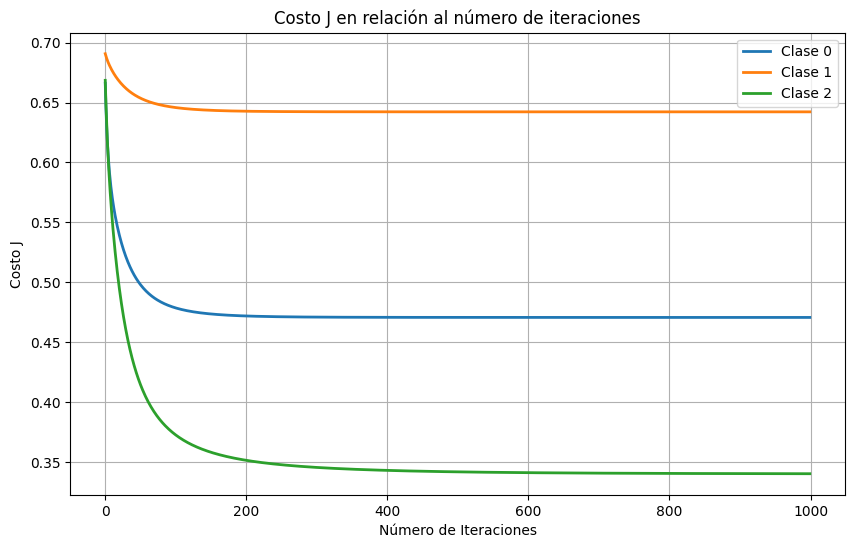

In [21]:
plt.figure(figsize=(10, 6))

plt.plot(J_history_class_0, label='Clase 0', lw=2)
plt.plot(J_history_class_1, label='Clase 1', lw=2)
plt.plot(J_history_class_2, label='Clase 2', lw=2)

plt.title('Costo J en relación al número de iteraciones')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo J')
plt.legend()
plt.grid()
plt.show()

## 6.6 Validación con los datos de entrenamiento y prueba

In [22]:
def predict(all_theta, X):
    # Multiplicamos X por la transposición de all_theta para obtener las probabilidades para cada clase y luego aplicamos la función sigmoide
    return np.round(sigmoid(X.dot(all_theta.T)))

In [23]:
pred_train= predict(theta_class_1, X_train_ready)
# np.mean(pred_train == y_train) calcula la proporción de predicciones correctas
print('Precision del conjunto de entrenamiento: {:.2f}%'.format(np.mean(pred_train == y_train) * 100))

pred_test = predict(theta_class_1, X_test_ready)
# np.mean(pred_train == y_train) calcula la proporción de predicciones correctas
print('Precision del conjunto de prueba: {:.2f}%'.format(np.mean(pred_test == y_test) * 100))

Precision del conjunto de entrenamiento: 55.51%
Precision del conjunto de prueba: 55.14%


# 7 Regresion One vs All

## 7.1 Implementamos clasificación One-vs-All

In [24]:
def oneVsAll(X, y, num_labels, alpha, num_iters):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n)) # Inicializamos una matriz para almacenar los parámetros (theta) para cada clase
    J_histories = []

    for c in range(num_labels):
        y_c = (y == c).astype(int) # Creamos un vector de etiquetas para la clase actual (1 si pertenece a la clase, 0 si no)
        initial_theta = np.zeros(n) # Inicializamos las thetas de esta clase con ceros para todas las características
        theta, J_history = descensoGradiente(X, y_c, alpha, num_iters)
        all_theta[c] = theta
        J_histories.append(J_history)

    # Calculamos el costo promedio por iteración
    J_promedio = np.mean(J_histories, axis=0)

    return all_theta, J_promedio

## 7.2 Calculamos las thetas y el costo para las tres clases

In [25]:
# Elegimos el valor para alpha y el número de iteraciones
alpha = 0.1
num_iters = 1000

# Entrenamos el modelo
all_theta, J_promedio = oneVsAll(X_train_ready, y_train, labels_counts, alpha, num_iters)

# Mostramos las thetas para cada clase
for i in range(all_theta.shape[1]):
    print("Thetha",i," para la clase 0:", all_theta[0,i]," ; "," para la clase 1:", all_theta[1,i]," ; ", " para la clase 2:", all_theta[2,i])

Thetha 0  para la clase 0: -1.1315332073031692  ;   para la clase 1: 0.13714270728018144  ;   para la clase 2: -2.4511332389206557
Thetha 1  para la clase 0: -0.0020598705232213414  ;   para la clase 1: 0.00325306889571168  ;   para la clase 2: -0.007628750095572738
Thetha 2  para la clase 0: -0.010944889044072235  ;   para la clase 1: 0.0061223654794052736  ;   para la clase 2: 0.0014675478602838672
Thetha 3  para la clase 0: -0.03329340334937603  ;   para la clase 1: -0.027759771567667766  ;   para la clase 2: 0.11961670260216772
Thetha 4  para la clase 0: -0.045882449715207864  ;   para la clase 1: -0.024373751462232536  ;   para la clase 2: 0.07219653235317386
Thetha 5  para la clase 0: -0.026982890307580238  ;   para la clase 1: 0.017719453807722833  ;   para la clase 2: 0.003864578084104305
Thetha 6  para la clase 0: -0.00029727386626971414  ;   para la clase 1: 0.008045564919101838  ;   para la clase 2: -0.008218499117368489
Thetha 7  para la clase 0: 0.02847114330628872  ;   pa

## 7.3 Gráficamos el costo en relación al número de iteraciones para las 3 clases

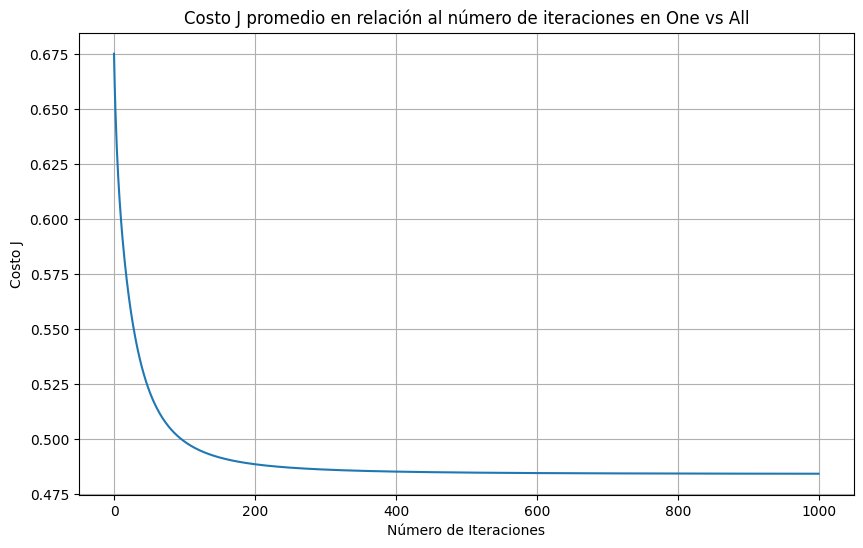

In [26]:
plt.figure(figsize=(10, 6))

plt.plot(J_promedio)

plt.title('Costo J promedio en relación al número de iteraciones en One vs All')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo J')
plt.grid()
plt.show()

# 8 Validación

## 8.1 Implementamos predicción One vs All

In [27]:
def predictOneVsAll(all_theta, X):
    # Multiplicamos X por la transposición de all_theta para obtener las probabilidades para cada clase y luego aplicamos la función sigmoide
    probabilities = sigmoid(X.dot(all_theta.T))

    # Devolvemos el índice de la clase con la mayor probabilidad
    return np.argmax(probabilities, axis=1)

## 8.2 Validación con los datos de entrenamiento y prueba

In [28]:
pred_train= predictOneVsAll(all_theta, X_train_ready)
# np.mean(pred_train == y_train) calcula la proporción de predicciones correctas
print('Precision del conjunto de entrenamiento: {:.2f}%'.format(np.mean(pred_train == y_train) * 100))

pred_test = predictOneVsAll(all_theta, X_test_ready)
# np.mean(pred_train == y_train) calcula la proporción de predicciones correctas
print('Precision del conjunto de prueba: {:.2f}%'.format(np.mean(pred_test == y_test) * 100))

Precision del conjunto de entrenamiento: 63.29%
Precision del conjunto de prueba: 63.37%
